In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
#1. import and check data
train_data = pd.read_csv("/Users/fanyingtang/Desktop/homework_1/project_2/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.info()
# consider Pclass, Sex, Age, SibSp, Parch, Fare and Embarked. 
# Age and Embarked has some missing data

# Not considering Name, Ticket, Cabin for the following reasons
# Name is complicated and may contain typo. 
# Ticket format is very heterogeneous and confusing.
# Majority of the Cabin info of is missing.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_data.describe()

/Users/fanyingtang/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Quick, Mrs. Frederick Charles (Jane Richards)",male,CA. 2343,G6,S
freq,1,577,7,4,644


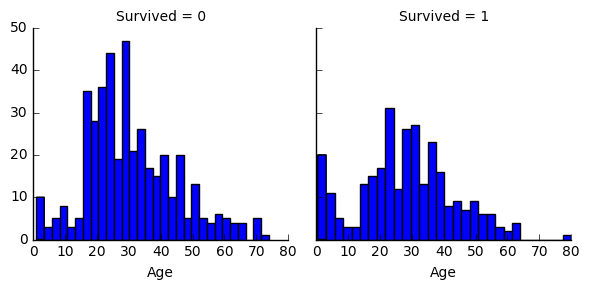

In [6]:
# 2. Determine which factors may affect the survival rate:

#2.1 check whether age affects survival by figure
age_fig = sns.FacetGrid(train_data, col='Survived')
age_fig.map(plt.hist, 'Age', bins=30)

In [7]:
#2.2 check whether sex affects survival
sex_data = train_data[["Sex", "Survived"]].groupby(['Sex'], \
                                        as_index=False).mean().sort_values(by='Survived', \
                                                                           ascending=False)
print(sex_data)

      Sex  Survived
0  female  0.742038
1    male  0.188908


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


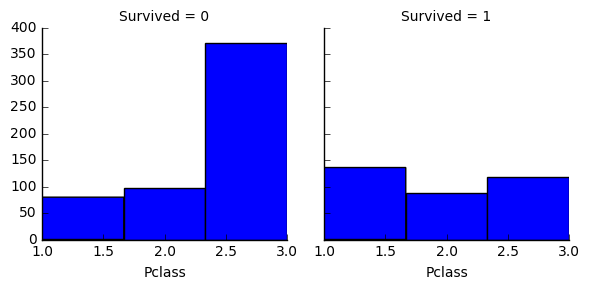

In [8]:
#2.3 check whether Pclass affects survival rate
Pclass_fig = sns.FacetGrid(train_data, col='Survived')
Pclass_fig.map(plt.hist, 'Pclass', bins=3)


train_data[["Pclass", "Survived"]].groupby(['Pclass'], \
                                          as_index=False).mean().sort_values(by='Survived', \
                                                                             ascending=False)



In [9]:
#2.4 check the effects of Sibling numbers
train_data[["SibSp", "Survived"]].groupby(['SibSp'], \
                                          as_index=False).mean().sort_values(by='Survived', \
                                                                             ascending=False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
#2.5 check the effects of parents numbers
train_data[["Parch", "Survived"]].groupby(['Parch'], \
                                          as_index=False).mean().sort_values(by='Survived', \
                                                                             ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
#2.6 check the effects of Embarked sites
train_data[["Embarked", "Survived"]].groupby(['Embarked'], \
                                          as_index=False).mean().sort_values(by='Survived', \
                                                                             ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


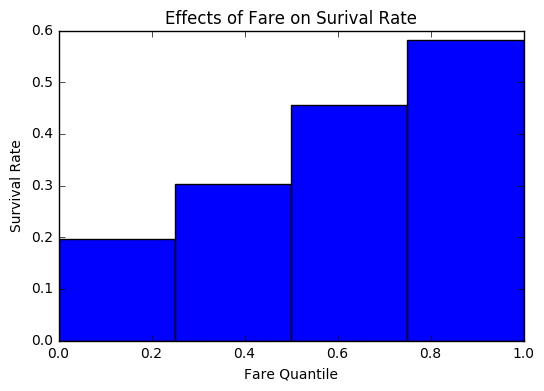

In [24]:
#2.7 check the effects of fare
victim = train_data.Fare[train_data.Survived == 0].value_counts()
survivor = train_data.Fare[train_data.Survived == 1].value_counts()

fareMax = train_data.Fare.max()
q1 = train_data.Fare.quantile(0.25)
q2 = train_data.Fare.quantile(0.5)
q3 = train_data.Fare.quantile(0.75)

bins_ad = []
bins = []
survive_rate = []
bins_ad.append(train_data.Survived[train_data.Fare <= q1].value_counts())
# return two values 0 --num of not survived; 1 -- num of survived
bins_ad.append(train_data.Survived[train_data.Fare <= q2].value_counts())
bins_ad.append(train_data.Survived[train_data.Fare <= q3].value_counts())
bins_ad.append(train_data.Survived[train_data.Fare <= fareMax].value_counts())

# initiate with the first quarter
bins.append(bins_ad[0]) 
survive_rate.append(bins[0][1]/(bins[0][0]+bins[0][1]))

for i in range(3):
    bins.append(bins_ad[i+1] - bins_ad[i])
    survive_rate.append(bins[i+1][1]/(bins[i+1][0]+bins[i+1][1]))
    
    
xs = [0,0.25,0.5,0.75]
ys = survive_rate
plt.bar(xs,ys,width = 0.25)

plt.title("Effects of Fare on Surival Rate")
plt.xlabel("Fare Quantile") 
plt.ylabel("Survival Rate") 
plt.show()
# plt.savefig("Fare.png")

In [25]:
# 3. Clean up data
# Import test data
test_data = pd.read_csv("/Users/fanyingtang/Desktop/homework_1/project_2/test.csv")

# 3.1 Change "Embarked", "Sex" into numbers
train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} )
test_data['Sex'] = test_data['Sex'].map( {'female': 1, 'male': 0} )

train_data['Embarked'] = train_data['Embarked'].map( {'S': 2, 'C': 1, 'Q':0} )
test_data['Embarked'] = test_data['Embarked'].map( {'S': 2, 'C': 1, 'Q':0} )


# 3.2 Remove columns "Name", "Ticket", "Cabin"
train_data_select = train_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test_data_select = test_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)

#train_data_select.head()
#test_data_select.head()
train_data_select.info()
test_data_select.info()
# train data has missing Age, Embarked values
# test data has missing Age, Fare values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null float64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [26]:
# 3.3 Fill up NA values for "Age", "Embarked", and "Fare" based on the median value of existing data.
median_test_age = test_data_select["Age"].median()
test_data_select["Age"][np.isnan(test_data_select["Age"])] = median_test_age

median_train_age = train_data_select["Age"].median()
train_data_select["Age"][np.isnan(train_data_select["Age"])] = median_train_age

median_test_fare  = test_data_select["Fare"].median()
test_data_select["Fare"][np.isnan(test_data_select["Fare"])] = median_test_fare

median_train_embark  = train_data_select["Embarked"].median()
train_data_select["Embarked"][np.isnan(train_data_select["Embarked"])] = median_train_embark

train_data_select.info()
test_data_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(3), int64(6)
memory usage: 62.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


/Users/fanyingtang/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/fanyingtang/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/fanyingtang/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/fanyingtang/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: S

In [27]:
# 4. Do logistic regression and submit the data
X_train = train_data_select.drop(['Survived'], axis = 1)
Y_train = train_data_select['Survived']

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
test_pred = logreg.predict(test_data_select)

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": test_pred
    })

submission.to_csv('pred.csv', index=False)